<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 928.44it/s]


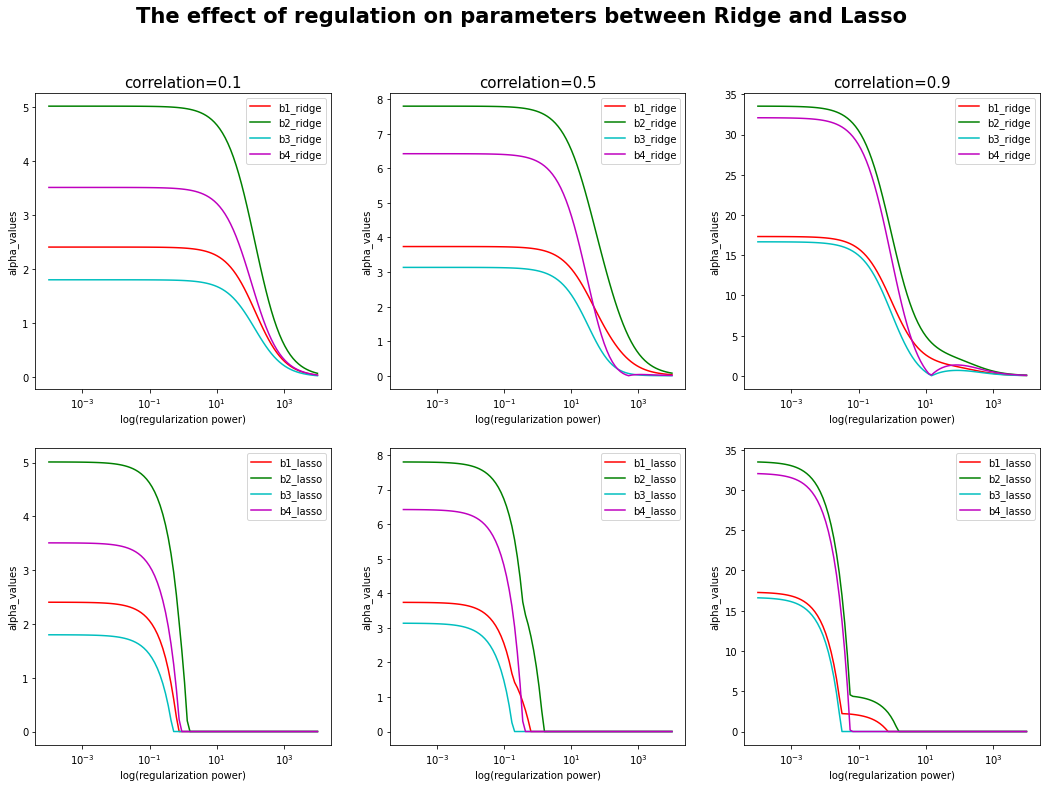

In [3]:
from tqdm import tqdm
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for correlation in [0.1, 0.5, 0.9]:
    # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

    # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

    # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []
    
    for alpha in tqdm(alpha_values):
        clf_ridge = Ridge(fit_intercept=False, alpha=alpha)
        clf_ridge.fit(X, y)
        params_ridge.append(clf_ridge.coef_)
        
        clf_lasso = Lasso(fit_intercept=False, alpha=alpha)
        clf_lasso.fit(X, y)
        params_lasso.append(clf_lasso.coef_)
        
    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)
    
    
    plt.subplot(2, 3, [0.1, 0.5, 0.9].index(correlation) + 1)
    plt.title("correlation=" + str(correlation), fontsize=15)
    plt.plot(alpha_values, np.abs(params_ridge[:, :1]), "r", label="b1_ridge")
    plt.plot(alpha_values, np.abs(params_ridge[:, 1:2]), "g", label="b2_ridge")
    plt.plot(alpha_values, np.abs(params_ridge[:, 2:3]), "c", label="b3_ridge")
    plt.plot(alpha_values, np.abs(params_ridge[:, 3:]), "m", label="b4_ridge")
    
    plt.xscale("log")
    plt.xlabel("log(regularization power)")
    plt.ylabel("alpha_values")
    plt.legend()
    
    plt.subplot(2, 3, [0.1, 0.5, 0.9].index(correlation) + 4)
    plt.plot(alpha_values, np.abs(params_lasso[:, :1]), "r", label="b1_lasso")
    plt.plot(alpha_values, np.abs(params_lasso[:, 1:2]), "g", label="b2_lasso")
    plt.plot(alpha_values, np.abs(params_lasso[:, 2:3]), "c", label="b3_lasso")
    plt.plot(alpha_values, np.abs(params_lasso[:, 3:]), "m", label="b4_lasso")
    
    plt.xscale('log')
    plt.xlabel("log(regularization power)")
    plt.ylabel("alpha_values")
    plt.legend()
    
plt.suptitle("The effect of regulation on parameters between Ridge and Lasso", fontsize=21, weight="bold")

plt.legend()
plt.show()


#### Comment: basically both models perform well where x have less correlation, and performances going worse with espesially high correlations. However, they perform better than linear regression in high correlations, because of the L1/L2 regulation to eliminate the multicollinearity. What's more, consider the effect of regulation of parameters (4 in this case), L1 (Lasso regression) is significantly sparser than L2 (Ridge regression), and the parameters become smaller as regulation increases, which is preventing overfitting.